In [72]:
#Import relevant packages
import pandas as pd
import matplotlib.pyplot as plt

#Read the data
df_pres = pd.read_csv('data/transport_performance.csv', sep=';')
df_mob= pd.read_csv('data/mobiliteit.csv', sep=';')
df_pres.head()

,Modes of travel,Population,Margins,Region characteristics,Periods,Transport performance (billion passenger kilometres )
0,Total,Population 6 years or older,Value,The Netherlands,2018,218.1
1,Total,Population 6 years or older,Value,The Netherlands,2019,218.8
2,Total,Population 6 years or older,Value,The Netherlands,2020,152.0
3,Total,Population 6 years or older,Value,The Netherlands,2021,168.4
4,Total,Population 6 years or older,Value,The Netherlands,2022,186.9


In [73]:
#Initialise prestation data
df_pres['Periods'] = pd.to_numeric(df_pres['Periods'], errors='coerce')
df_pres['Transport performance (billion passenger kilometres )'] = pd.to_numeric(df_pres['Transport performance (billion passenger kilometres )'], errors='coerce')

#Rename columns
df_pres.rename({'Transport performance (billion passenger kilometres )': 'Total travel'}, axis=1, inplace=True)

#Drop unnesecary columns
df_pres.drop('Margins', axis=1, inplace=True)
df_pres.drop('Population', axis=1, inplace=True)

df_pres.head()

,Modes of travel,Region characteristics,Periods,Total travel
0,Total,The Netherlands,2018,218.1
1,Total,The Netherlands,2019,218.8
2,Total,The Netherlands,2020,152.0
3,Total,The Netherlands,2021,168.4
4,Total,The Netherlands,2022,186.9


In [ ]:
#Initialise mobility data
df_mob.head()

,Populatie,Geslacht,Persoonskenmerken,Reismotieven,Marges,Perioden,Regio's,Gemiddeld per persoon per jaar/Verplaatsingen (aantal),Gemiddeld per persoon per jaar/Afstand (reizigerskilometers),Gemiddeld per persoon per jaar/Reisduur (uren)
0,Populatie: 6 jaar of ouder,Totaal mannen en vrouwen,Totaal personen,Totaal,Waarde,2018,Nederland,1015,13200,453.8
1,Populatie: 6 jaar of ouder,Totaal mannen en vrouwen,Totaal personen,Totaal,Waarde,2019,Nederland,989,13140,452.6
2,Populatie: 6 jaar of ouder,Totaal mannen en vrouwen,Totaal personen,Totaal,Waarde,2020,Nederland,861,9105,378.0
3,Populatie: 6 jaar of ouder,Totaal mannen en vrouwen,Totaal personen,Totaal,Waarde,2021,Nederland,915,9942,424.9
4,Populatie: 6 jaar of ouder,Totaal mannen en vrouwen,Totaal personen,Totaal,Waarde,2022,Nederland,984,11027,442.2


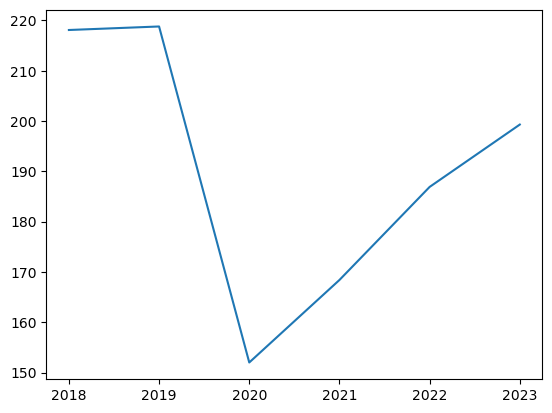

In [4]:
#Trying out some stuff

data_selected= df_pres[(df_pres['Region characteristics']=='The Netherlands') & (df_pres['Modes of travel']=='Total')]

plt.plot(data_selected['Periods'], data_selected['Total travel'])
plt.show()


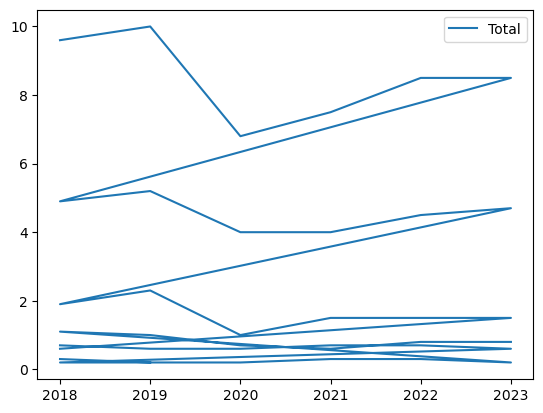

In [10]:
data_selected= df_pres[(df_pres['Region characteristics']=='Fryslân (PV)')]

plt.plot(data_selected['Periods'], data_selected['Total travel'])
plt.legend(data_selected['Modes of travel'])
plt.show()

In [ ]:
import plotly.express as px

g2 = px.line(
    data_selected,
    x="Periods",
    y="Total travel",
    color="Modes of travel",      
    title="Fryslân travel modes over time"
)

In [12]:
g2.show()

In [25]:
data_selected_bike = df_pres[(df_pres['Modes of travel'] == 'Bus/tram/metro') & (df_pres['Region characteristics'].isin(['Fryslân (PV)', 'Groningen (PV)', 'Drenthe (PV)', 'Overijssel (PV)', 'Flevoland (PV)', 'Gelderland (PV)', 'Utrecht (PV)', 'Noord-Holland (PV)', 'Zuid-Holland (PV)', 'Zeeland (PV)', 'Noord-Brabant (PV)', 'Limburg (PV)']))]

OV = px.line(
    data_selected_bike,
    x="Periods",
    y="Total travel",
    color="Region characteristics",      
    title="Public transport travel over time"
)

OV.show()

In [53]:
data_selected_bike = df_pres[(df_pres['Modes of travel'] == 'Bike') & (df_pres['Region characteristics'].isin(['Fryslân (PV)', 'Groningen (PV)', 'Drenthe (PV)', 'Overijssel (PV)', 'Flevoland (PV)', 'Gelderland (PV)', 'Utrecht (PV)', 'Noord-Holland (PV)', 'Zuid-Holland (PV)', 'Zeeland (PV)', 'Noord-Brabant (PV)', 'Limburg (PV)']))]

g3 = px.line(
    data_selected_bike,
    x="Periods",
    y="Total travel",
    color="Region characteristics",      
    title="Bike travel over time"
)

g3.show()

In [59]:
data_selected_car = df_pres[(df_pres['Modes of travel'] == 'Passenger car (driver)') & (df_pres['Region characteristics'].isin(['Fryslân (PV)', 'Groningen (PV)', 'Drenthe (PV)', 'Overijssel (PV)', 'Flevoland (PV)', 'Gelderland (PV)', 'Utrecht (PV)', 'Noord-Holland (PV)', 'Zuid-Holland (PV)', 'Zeeland (PV)', 'Noord-Brabant (PV)', 'Limburg (PV)']))]

#data_selected_car = df_pres

baseline = data_selected_car.groupby('Region characteristics')['Total travel'].transform('first')
                                                                  
print(baseline.head())
#baseline = baseline.rename(columns={'Total travel': 'Baseline travel'})

# Merge baseline back to full dataset
#data_selected_car_pct = data_selected_car.merge(baseline, on='Region characteristics')

# Calculate percentage relative to 2018
data_selected_car_pct['Relative travel (%)'] = (data_selected_car_pct['Total travel'] / data_selected_car_pct['Baseline travel']) * 100

#data_selected_car1 = data_selected_car / baseline

car = px.line(
    data_selected_car_pct,
    x="Periods",
    y="Relative travel (%)",
    color="Region characteristics",      
    title="Car travel over time"
)

car.show()

163    3.8
164    3.8
165    3.8
166    3.8
167    3.8
Name: Total travel, dtype: float64


In [81]:
import pandas as pd
import plotly.express as px

# 1. Make sure Periods are clean (extract 4-digit year if needed)
#df_pres['Periods_clean'] = df_pres['Periods'].astype(str).str.extract(r'(\d{4})').astype(int)

# 2. Filter data for passenger car and selected regions
regions = ['Fryslân (PV)', 'Groningen (PV)', 'Drenthe (PV)', 'Overijssel (PV)', 
           'Flevoland (PV)', 'Gelderland (PV)', 'Utrecht (PV)', 'Noord-Holland (PV)', 
           'Zuid-Holland (PV)', 'Zeeland (PV)', 'Noord-Brabant (PV)', 'Limburg (PV)']

#areas

data_selected_car = df_pres[
    (df_pres['Modes of travel'] == 'Total') &
    (df_pres['Region characteristics'].isin(regions))
].copy()

# 3. Build baseline (2018 value per region)
baseline = data_selected_car[data_selected_car['Periods'] == 2018]
baseline = baseline[['Region characteristics', 'Total travel']]
baseline = baseline.rename(columns={'Total travel': 'Baseline travel'})

# 4. Merge baseline with all rows
data_selected_car_pct = data_selected_car.merge(baseline, on='Region characteristics', how='left')

# 5. Compute relative travel
data_selected_car_pct['Relative travel (%)'] = (
    data_selected_car_pct['Total travel'] / data_selected_car_pct['Baseline travel']
) * 100

# 6. Plot
fig = px.line(
    data_selected_car_pct,
    x='Periods',
    y='Relative travel (%)',
    color='Region characteristics',
    title='Total travel over time (2018 = 100%)'
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Relative travel (%)'
)
fig.show()



In [83]:
# 1. Select only 2019 and 2023
diff_df = data_selected_car_pct[data_selected_car_pct['Periods'].isin([2019, 2023])]

# 2. Pivot so each region has 2019 and 2023 in separate columns
diff_pivot = diff_df.pivot_table(
    index='Region characteristics',
    columns='Periods',
    values='Relative travel (%)'
).reset_index()

# 3. Compute the difference (2023 - 2019)
diff_pivot['Difference (2023 - 2019)'] = diff_pivot[2023] - diff_pivot[2019]

# 4. Optional: sort by difference to see biggest changes
diff_pivot = diff_pivot.sort_values(by='Difference (2023 - 2019)', ascending=False)

print(diff_pivot)


Periods Region characteristics        2019        2023  \
0                 Drenthe (PV)   93.333333   90.666667   
6           Noord-Brabant (PV)   99.378882   95.962733   
3              Gelderland (PV)  100.719424   93.525180   
1               Flevoland (PV)  100.000000   91.803279   
5                 Limburg (PV)   96.124031   87.596899   
10                Zeeland (PV)  113.636364  104.545455   
7           Noord-Holland (PV)   93.767705   84.135977   
11           Zuid-Holland (PV)  101.184834   91.232227   
8              Overijssel (PV)  101.290323   90.967742   
9                 Utrecht (PV)  111.904762   98.809524   
2                 Fryslân (PV)  104.166667   88.541667   
4               Groningen (PV)  103.846154   85.897436   

Periods  Difference (2023 - 2019)  
0                       -2.666667  
6                       -3.416149  
3                       -7.194245  
1                       -8.196721  
5                       -8.527132  
10                      -9.09

In [87]:
import plotly.express as px

fig = px.bar(
    diff_pivot,
    x='Region characteristics',
    y='Difference (2023 - 2019)',
    title='Change in relative total travel between 2019 and 2023'
)

fig.update_layout(
    xaxis_title='Region',
    yaxis_title='Difference in percentage',
    xaxis_tickangle=45
)
fig.show()


In [62]:
print(df_pres['Periods'].unique())


[2019 2020 2021 2022 2023]


In [63]:
df_pres['Year'] = df_pres['Periods'].astype(str).str.extract(r'(\d{4})').astype(int)


In [64]:
regions = [
 'Fryslân (PV)', 'Groningen (PV)', 'Drenthe (PV)', 'Overijssel (PV)',
 'Flevoland (PV)', 'Gelderland (PV)', 'Utrecht (PV)', 'Noord-Holland (PV)',
 'Zuid-Holland (PV)', 'Zeeland (PV)', 'Noord-Brabant (PV)', 'Limburg (PV)'
]

data_selected_car = df_pres[
    (df_pres['Modes of travel'] == 'Passenger car (driver)') &
    (df_pres['Region characteristics'].isin(regions))
].copy()


In [65]:
print(data_selected_car['Year'].unique())


[2019 2020 2021 2022 2023]
